In [23]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
from itertools import repeat

In [24]:
m1=open('data/match_1.json')
df1 = json.load(m1)

m2=open('data/match_2.json')
df2 = json.load(m2)

df1=pd.DataFrame(df1)
df2=pd.DataFrame(df2)

In [25]:
df1

,label,norm
0,walk,"[23.177037336396975, 23.36152528524938, 21.535..."
1,walk,"[20.998214383911275, 19.182798059840767, 18.27..."
2,walk,"[21.95259682019565, 20.62720484424047, 22.5554..."
3,walk,"[19.39209748358647, 19.30460665293087, 18.9787..."
4,rest,"[22.069263037713093, 19.672270483203395, 19.88..."
...,...,...
569,walk,"[21.245737438782683, 21.938836193196945, 21.24..."
570,walk,"[20.272347748199333, 21.820302584302983, 21.21..."
571,run,"[90.21306005395827, 72.12712844635696, 63.5643..."
572,tackle,"[44.79510251441832, 27.26406867633046, 88.6164..."


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   574 non-null    object
 1   norm    574 non-null    object
dtypes: object(2)
memory usage: 9.1+ KB


In [27]:
df1[['label']]=df1[['label']].astype('category')
df2[['label']]=df2[['label']].astype('category')

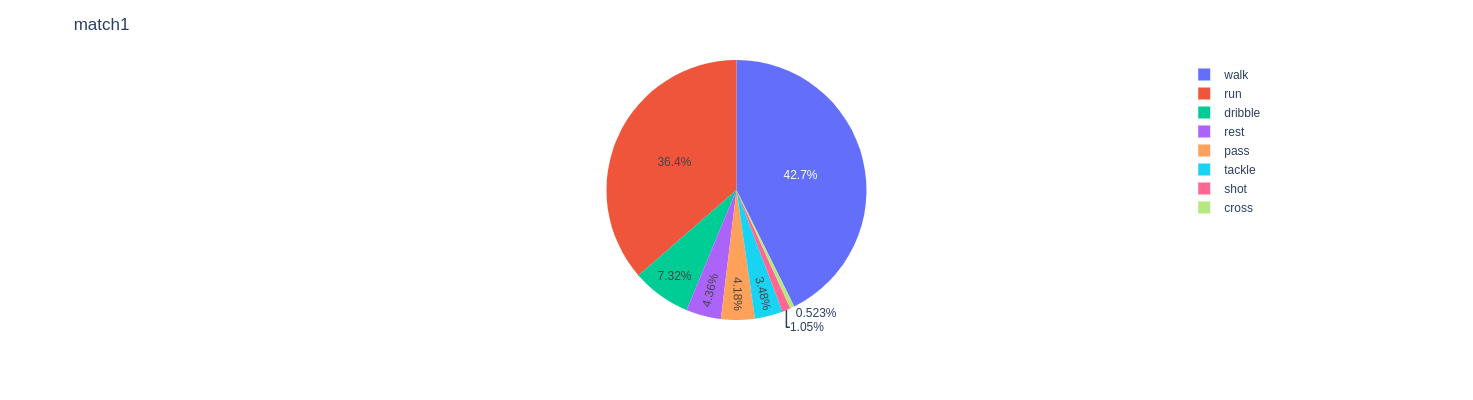

In [28]:
fig=px.pie(df1, names="label")

fig.update_layout(title='match1',
                  width=500,
                  height=400)

fig.show()

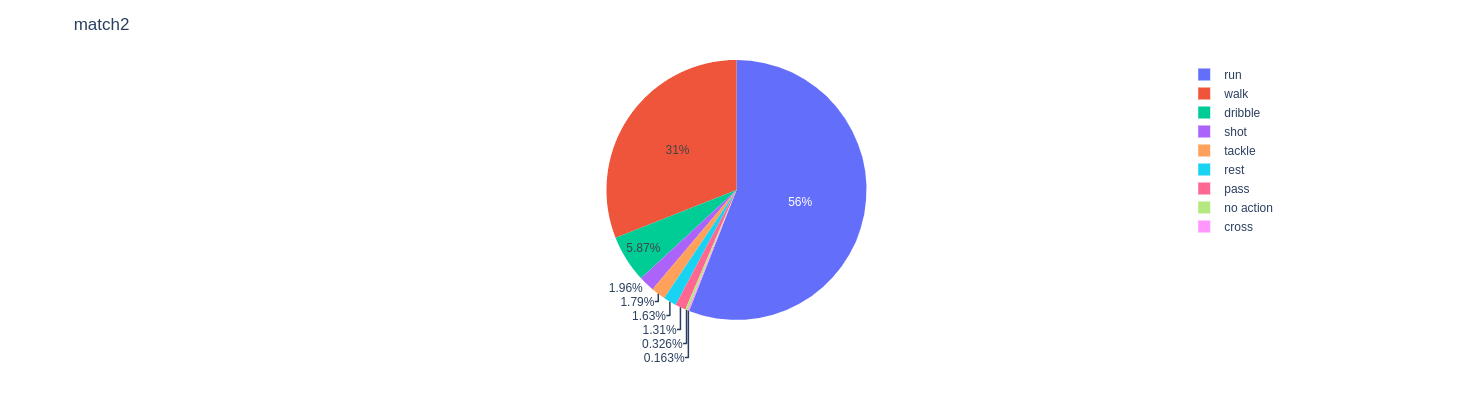

In [29]:
fig=px.pie(df2, names="label")

fig.update_layout(title='match2',
                  width=500,
                  height=400)

fig.show()

In [30]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [31]:
idx1=list(df1['label'].value_counts().index)

In [42]:
def flatten_column(df):
    label_=[]
    norm_=[]
    for i in range(len(df1)):
        norm=df.iloc[i,1]
        norm_.append(norm)
        df1.iloc[i,0]*len(norm)
        label_.append(list(repeat(df1.iloc[i,0],len(norm))))
    
    return flatten(label_),flatten(norm_)


In [43]:
lab1,norm1=flatten_column(df1)
lab2,norm2=flatten_column(df2)
df1_long=pd.DataFrame({'label':lab1,'norm':norm1})
df2_long=pd.DataFrame({'label':lab2,'norm':norm2})

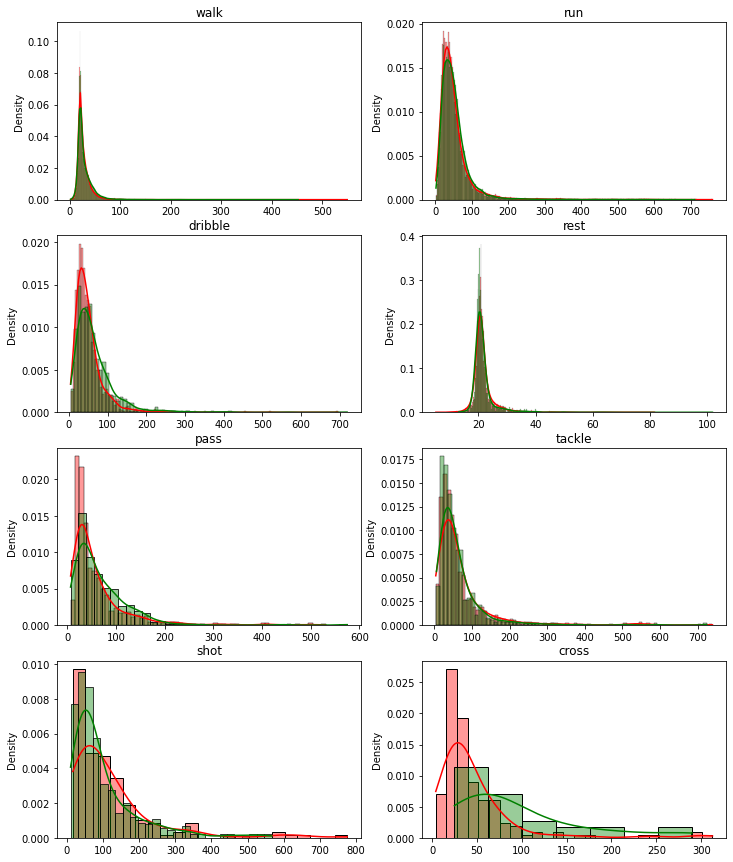

In [44]:
f1=plt.figure(figsize=(12,15))
for i,v in enumerate(idx1):
    norm1=df1[df1['label']==v]['norm'].to_list()
    norm1_list=flatten(norm1)
    norm2=df2[df2['label']==v]['norm'].to_list()
    norm2_list=flatten(norm2)
    f1.add_subplot(4,2,i+1)
    sns.histplot(x=norm1_list,kde=True,stat='density',color='red',alpha=0.4).set(title=v)
    sns.histplot(x=norm2_list,kde=True,stat='density',color='green',alpha=0.4).set(title=v)


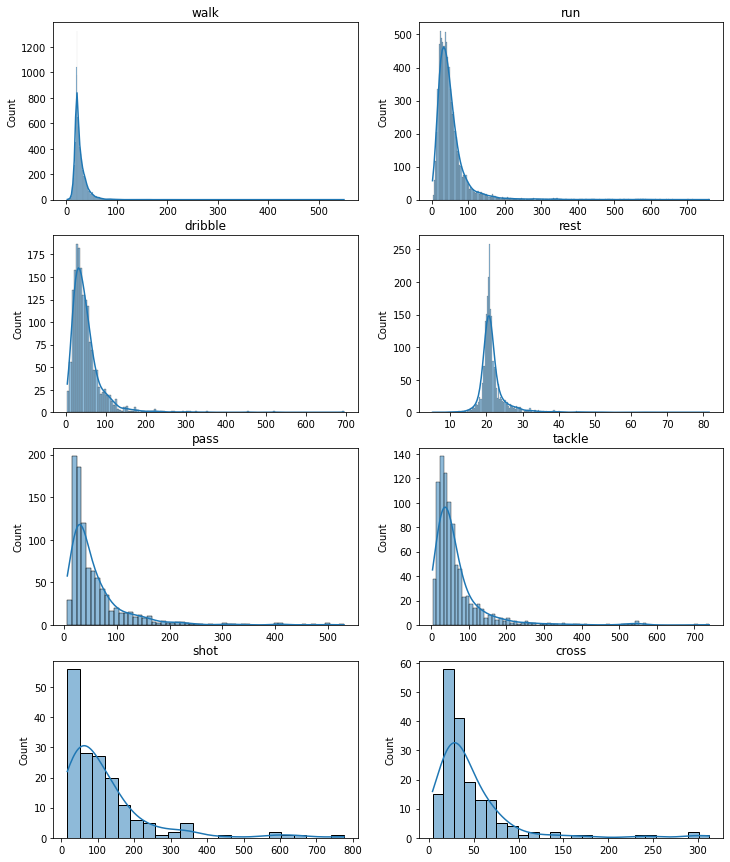

In [45]:
f1=plt.figure(figsize=(12,15))
med1=[]
mean1=[]
std1=[]
norm1=[]
for i,v in enumerate(idx1):
    norm=df1[df1['label']==v]['norm'].to_list()
    norm_list=flatten(norm)
    norm1.append(norm)
    mean1.append(round(np.mean(norm_list)))
    med1.append(round(np.median(norm_list)))
    std1.append(round(np.std(norm_list)))
    f1.add_subplot(4,2,i+1)
    sns.histplot(x=norm_list,kde=True).set(title=v)

In [46]:
pd.DataFrame({'action':idx1,
              'mean':mean1,
               'median':med1,
              'Ecart-type':std1})

,action,mean,median,Ecart-type
0,walk,28,24,14
1,run,53,41,52
2,dribble,51,41,42
3,rest,22,21,5
4,pass,60,37,63
5,tackle,69,46,81
6,shot,120,85,123
7,cross,47,32,48


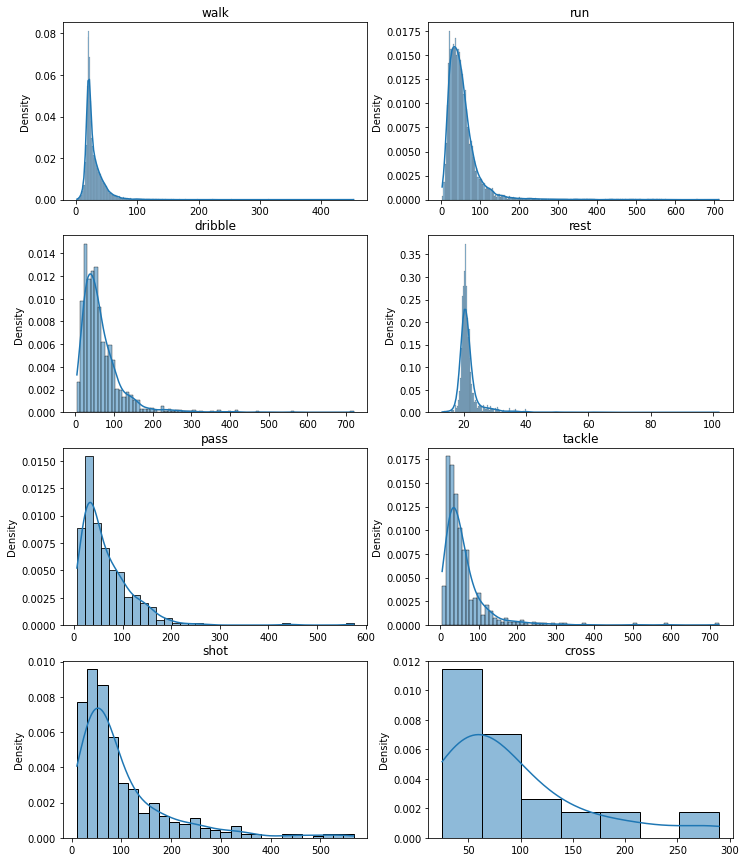

In [47]:
mean2=[]
med2=[]
std2=[]
norm
f2=plt.figure(figsize=(12,15))
for i,v in enumerate(idx1):
    norm=df2[df2['label']==v]['norm'].to_list()
    norm_list=flatten(norm)
    mean2.append(round(np.mean(norm_list)))
    med2.append(round(np.median(norm_list)))
    std2.append(round(np.std(norm_list)))
    f2.add_subplot(4,2,i+1)
    sns.histplot(x=norm_list,kde=True,stat = "density").set(title=v)

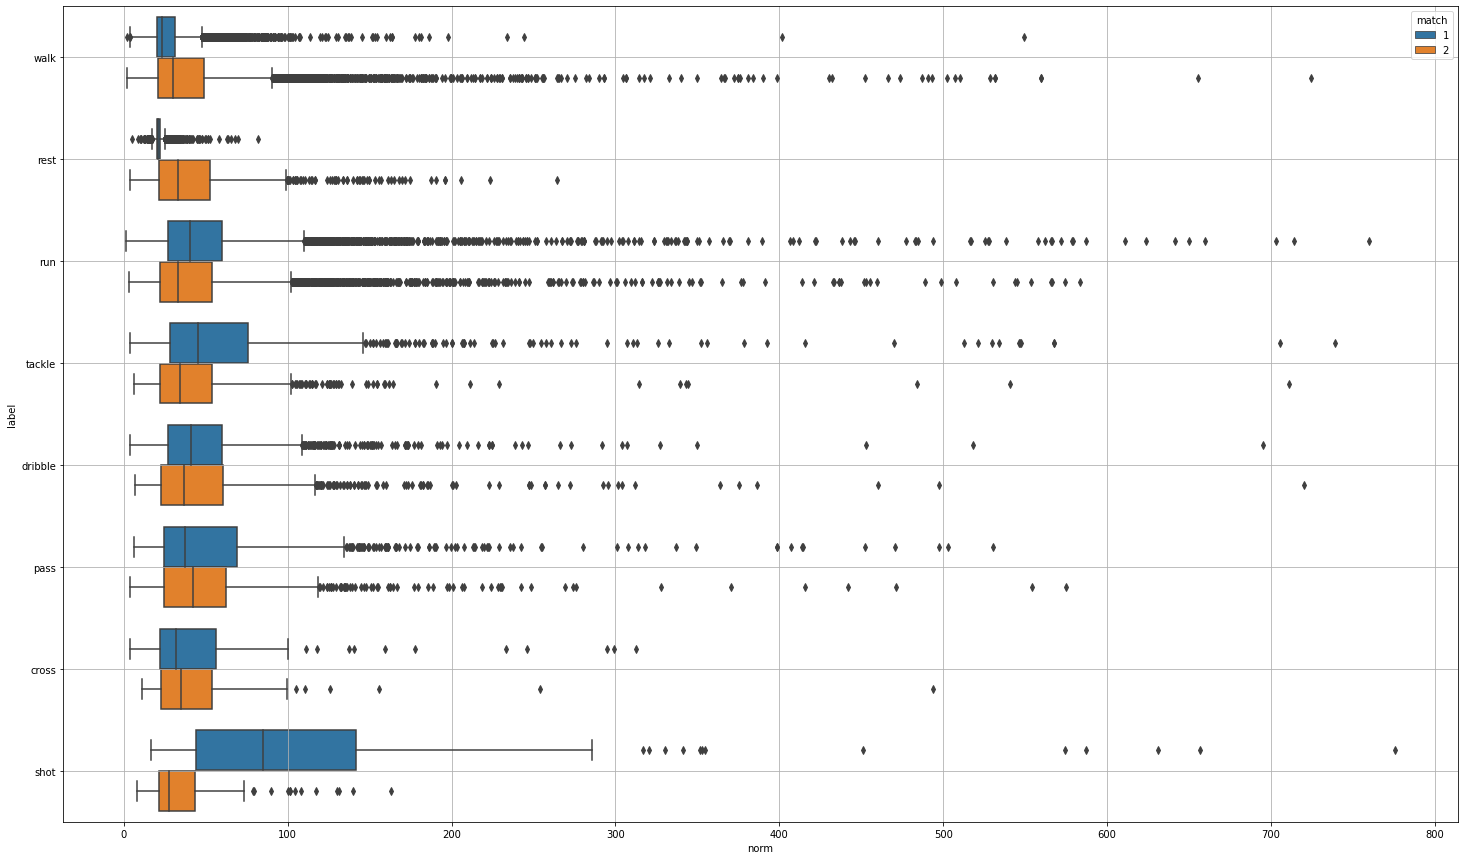

In [49]:
df1_long['match']=1
df2_long['match']=2
# stack the two DataFrames
df_total=pd.concat([df1_long, df2_long], ignore_index=True, axis=0)

plt.figure(figsize=(25,15))
sns.boxplot(data=df_total,x='norm',y='label',hue='match')
plt.grid()

In [25]:
pd.DataFrame({'action':idx1,
              'mean':mean2,
               'median':med2,
              'Ecart-type':std2})

,action,mean,median,Ecart-type
0,walk,29,24,16
1,run,54,45,44
2,dribble,66,52,56
3,rest,22,21,5
4,pass,66,48,55
5,tackle,61,44,63
6,shot,103,67,98
7,cross,94,68,70


In [26]:
norm1_total=df1['norm'].to_list()
norm1_total=flatten(norm1_total)

norm2_total=df2['norm'].to_list()
norm2_total=flatten(norm2_total)

(0.0, 800.0)

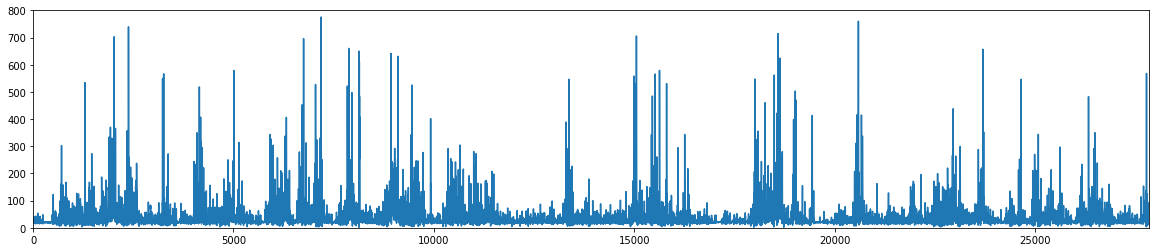

In [28]:
plt.figure(figsize=(20,4))
plt.plot(norm1_total)
plt.xlim(0,len(norm1_total))
plt.ylim(0,800)

(0.0, 800.0)

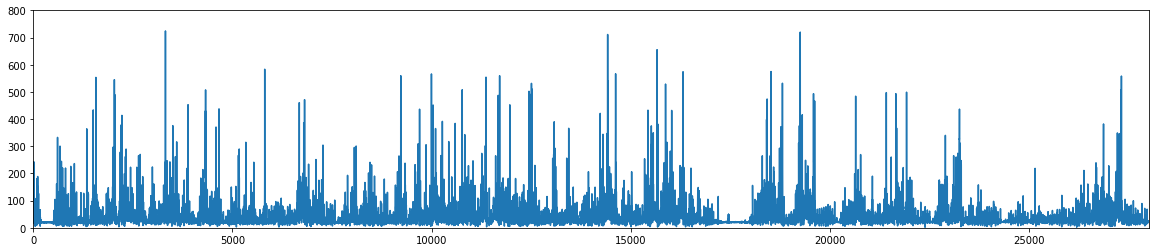

In [29]:

plt.figure(figsize=(20,4))
plt.plot(norm2_total)
plt.xlim(0,len(norm2_total))
plt.ylim(0,800)

In [49]:
df2[df2['label']=='no action']

,label,norm
0,no action,"[104.42423889328715, 87.63989343949717, 128.52..."
524,no action,"[51.2820728424938, 45.38173583425492, 34.00457..."
